# Life Expectancy and GDP Portfolio Project

**Project Objectives**
 - Complete a project to add to your portfolio
 - Use seaborn and Matplotlib to create visualizations
 - Become familiar with presenting and sharing data visualizations
 - Preprocess, explore, and analyze data

**Scope**

This is a small dataset that contains six countries in total. With that in mind, this project will look to answer the following questions:

 1. Has there been an increase in life expectancy in the last decade?
 2. Are there noticible trends in Gross Domestic Product (GDP) in the last decade?
 3. Is there a correlation between Gross Domestic Product and life expectancy?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

df = pd.read_csv("all_data.csv")
print(df.head(5))

  Country  Year  Life expectancy at birth (years)           GDP
0   Chile  2000                              77.3  7.786093e+10
1   Chile  2001                              77.3  7.097992e+10
2   Chile  2002                              77.8  6.973681e+10
3   Chile  2003                              77.9  7.564346e+10
4   Chile  2004                              78.0  9.921039e+10


In [2]:
print(df.Year.unique())

[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


In [3]:
print(df.Country.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


1. Has there been an increase in life expectancy in the last decade?
 
 - Renaming the Life exapectancy column is going to help with producing readable code

In [4]:
df["Life_Expectancy"] = df["Life expectancy at birth (years)"]
df = df.drop(columns = ["Life expectancy at birth (years)"])

In [5]:
print(df.head(5))

  Country  Year           GDP  Life_Expectancy
0   Chile  2000  7.786093e+10             77.3
1   Chile  2001  7.097992e+10             77.3
2   Chile  2002  6.973681e+10             77.8
3   Chile  2003  7.564346e+10             77.9
4   Chile  2004  9.921039e+10             78.0


After tidying, the next step will be to visualize the data for life expectancy to get an understanding of the dataset.

Text(0.5, 0, 'Life Expectancy at birth (years)')

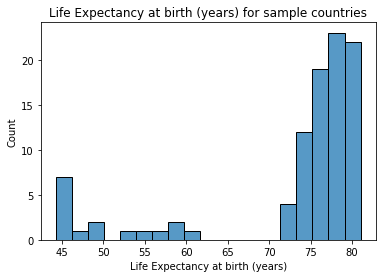

In [6]:
sns.histplot(df.Life_Expectancy)
plt.title('Life Expectancy at birth (years) for sample countries')
plt.xlabel('Life Expectancy at birth (years)')

The data is left-skewed which is what I expected would happen as the mean for the world is around 70 years old. 

Next, I am going to examine each country

Text(0, 0.5, 'Life Expectancy at birth (years)')

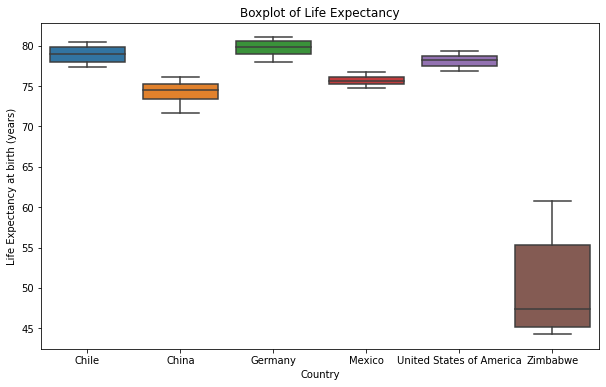

In [7]:
plt.figure(figsize=(10,6))
sns.boxplot(x = df.Country, y = df.Life_Expectancy)
plt.title('Boxplot of Life Expectancy')
plt.ylabel('Life Expectancy at birth (years)')

The outlier here is Zimbabwe when comparing average life expectancy from 2000-2015.

Text(0, 0.5, 'Life Expectancy at birth (years)')

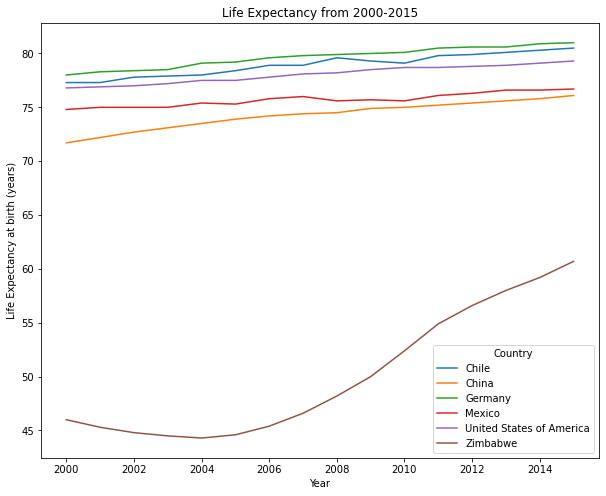

In [8]:
plt.figure(figsize=(10,8))
sns.lineplot(x = 'Year', y = 'Life_Expectancy', hue = 'Country', data = df)
plt.title('Life Expectancy from 2000-2015')
plt.ylabel('Life Expectancy at birth (years)')

2. Are there noticible trends in GDP in the last decade?

Text(0, 0.5, 'GDP (Trillions; US Dollars)')

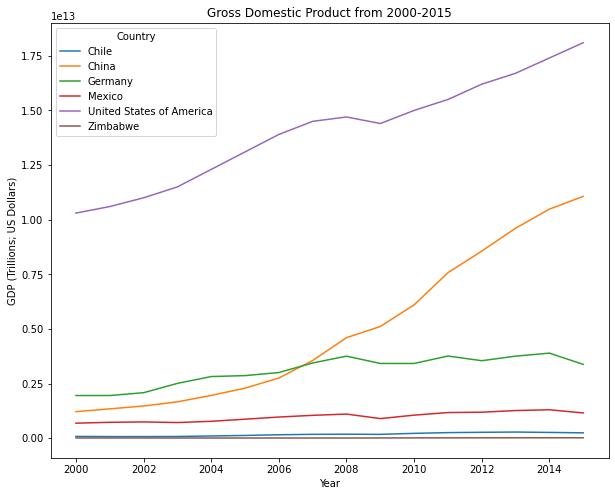

In [9]:
plt.figure(figsize=(10,8))
sns.lineplot(x = df.Year, y = df.GDP, hue = df.Country)
plt.title("Gross Domestic Product from 2000-2015")
plt.ylabel('GDP (Trillions; US Dollars)')

The major outlier in this sample is the United States. They have a substantial distance between themselves and the second highest GDP in 2015; China. However, this graph doesn't highlight a large difference between the bottom three economies. Looking at average GDP growth during that time might help.

In [10]:
meanGDP = df.groupby('Country')['GDP'].mean().reset_index()
print(meanGDP)

                    Country           GDP
0                     Chile  1.697888e+11
1                     China  4.957714e+12
2                   Germany  3.094776e+12
3                    Mexico  9.766506e+11
4  United States of America  1.407500e+13
5                  Zimbabwe  9.062580e+09


Text(0.5, 1.0, 'Average GDP from 2000-2015')

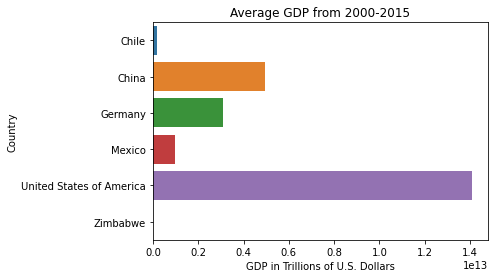

In [11]:
sns.barplot(x='GDP', y='Country', data = meanGDP)
plt.xlabel("GDP in Trillions of U.S. Dollars")
plt.title('Average GDP from 2000-2015')

The barplot helps to distinguish average GDP of the lower range of values. Zimbabwe is not noticiable on the map while Chile and Mexico have visible bars to compare. 

3. Is there a correlation between Gross Domestic Product and life expectancy?

<AxesSubplot:xlabel='Life_Expectancy', ylabel='GDP'>

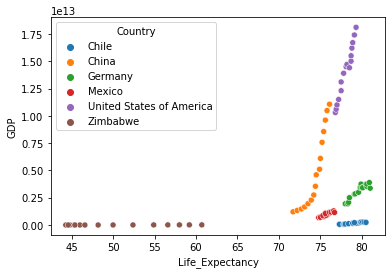

In [12]:
sns.scatterplot(x = 'Life_Expectancy', y = 'GDP',hue = 'Country', data=df)

Based on this one plot, it is inconclusive to say if their is a linear relationship between GDP and Life Expectancy

In [13]:
df.corr(method ='pearson')

,Year,GDP,Life_Expectancy
Year,1.000000,0.208288,0.155050
GDP,0.208288,1.000000,0.343207
Life_Expectancy,0.155050,0.343207,1.000000


The table above indicates that GDP and Life Expectancy have a weak positive correlation (.343). However, I don't place much weight into this number as it is unclear if the relationship is linear.

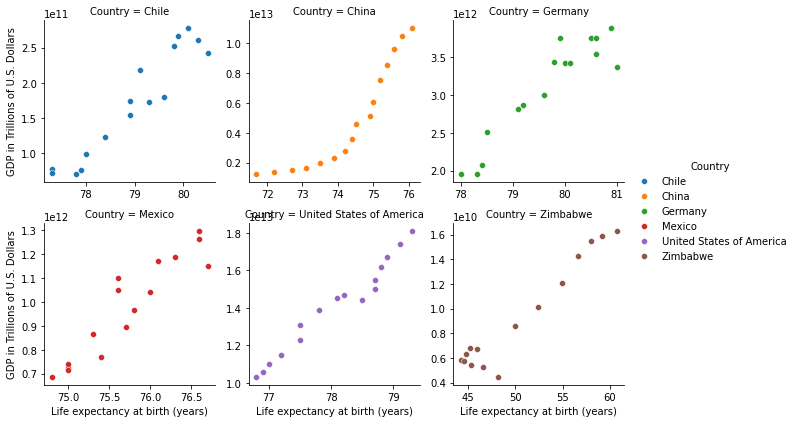

In [14]:
graph = sns.FacetGrid(df, col="Country", col_wrap=3,
                      hue = "Country", sharey = False, sharex = False)
graph = (graph.map(sns.scatterplot,"Life_Expectancy", "GDP")
         .add_legend()
         .set_axis_labels("Life expectancy at birth (years)", "GDP in Trillions of U.S. Dollars"));

# Conclusion

**Research Questions**

 1. Has there been an increase in life expectancy in the last decade?
      - Yes, every country saw an increase in life expectancy.
 2. Are there noticible trends in Gross Domestic Product (GDP) in the last decade?
      - Yes, the United States and China have the largest growth out of the sample taken. They also are the only two that have seen consistent growth. The other four contries appear to be somewhat stagnant or fluctuating.
 3. Is there a correlation between Gross Domestic Product and life expectancy?
      - Yes, a weak positive correlation can be shown. However, more work is needed to test out the relationship. The work has been done by other scholars, but it falls out of the scope of this assignment to include.